---
# Lead Dell Fortaleza - Curso de Machine Learning üìä
### Oficina 2 - K-means Clustering

Neste notebook iremos realizar a an√°lise do conjunto de dados "Mall Customers" da Lead Dell. Ser√° implementado um modelo de k-means para agrupar os clientes, usando como atributos a idade e seu respectivo <i>score</i>.


Por: Pedro Florencio de Almeida Neto

---

<b>Explica√ß√£o do modelo:</b>

A clusteriza√ß√£o √© o processo de separar dados e agrup√°-los em clusters usando como base na semelhan√ßa entre eles. √â um modelo de aprendizado n√£o-supervisionado, uma vez que a priori n√£o h√° r√≥tulo nos dados. H√° v√°rias formas de calcular a dist√¢ncia entre dados, entre elas temos:

<b>C√°lculo da dist√¢ncia dos dados:</b>

* Dist√¢ncia Manhattan:

                                                         |x1 - x2| + |y1 - y2|

* Dist√¢ncia Euclidiana
$$
\sqrt[]{(x1-x2)¬≤+(y1-y2)¬≤}	
$$

Para realizar a divis√£o dos dados, h√° duas abordagens gerais:

* <b>Algoritmos hier√°quicos</b>

    √Årvores bin√°rias
    
    Dendograma

Podem ainda ser divididos em:

    Aglomerativos
    
    Divisivos

* <b>Algoritmos n√£o-hier√°quicos</b>

K-means

<b> Algoritmo K-means </b>
1. Dividir os dados em K grupos com centr√≥ides criadas aleatoriamente;
2. Repetir at√© que a condi√ß√£o de parada seja satisfeita:
    - Calcular a dist√¢ncia de cada dado ao centr√≥ide;
    - Atribuir o dado ao grupo com menor dist√¢ncia ao centr√≥ide;
    - Atualizar todos os centr√≥ides.

Funcionamento:

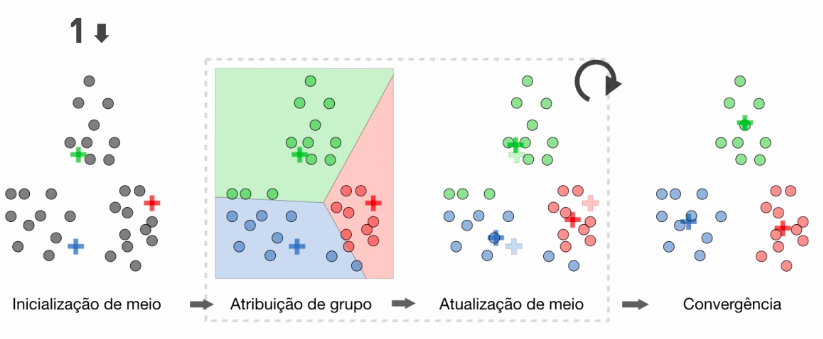

Fonte: Lead Fortaleza

<b> Como definir o valor de K? </b>

Atrav√©s do m√©todo <b>Elbow</b> que plota a vari√¢ncia dos dados em fun√ß√£o do n√∫mero de clusters.

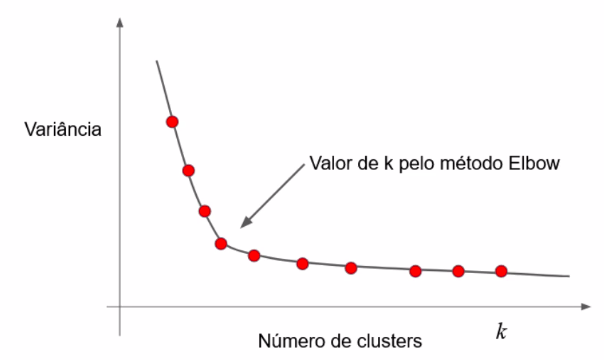

Fonte: Lead Fortaleza

Escolhe-se o valor no qual a medida que k cresce, a partir deste valor atual, o valor de vari√¢ncia n√£o se modifica significativamente.

---
<b> Importando as bibliotecas necess√°rias </b>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

<b> Importando o dataset </b>

In [83]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [84]:
df.shape # H√° 200 clientes e 5 atributos: Id do cliente, g√™nero, idade, renda anual e score

(200, 5)

<b> Verificando a presen√ßa de dados nulos </b>

In [85]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<b> Verificando as estat√≠sticas do conjunto de dados </b>

In [86]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

<b> Gr√°fico Idade x Score do cliente <b/>

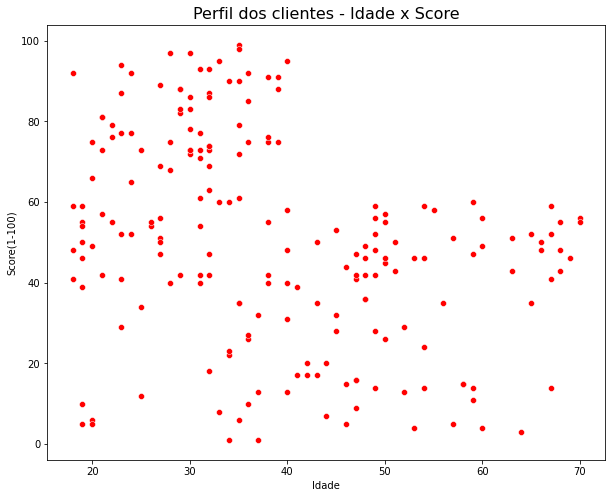

In [87]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df,color='red')
plt.xlabel('Idade')
plt.ylabel('Score(1-100)')
plt.title('Perfil dos clientes - Idade x Score',fontdict={'fontsize':16})
plt.show()

<b> Selecionando dados para agrupamento </b>

In [88]:
# Idade e score s√£o os atributos selecionados
X = df[['Age','Spending Score (1-100)']] 
X

Age  Spending Score (1-100)
0     19                      39
1     21                      81
2     20                       6
3     23                      77
4     31                      40
..   ...                     ...
195   35                      79
196   45                      28
197   32                      74
198   32                      18
199   30                      83

[200 rows x 2 columns]

<b> Usando K-means e clusterizando com K = 5</b>

In [89]:
# Criando o modelo usando scikit learn
modelo = KMeans(n_clusters = 5, init='k-means++')

In [90]:
# Realizando as rotula√ß√µes com base no modelo treinado
y = modelo.fit_predict(X)

In [91]:
y

array([2, 0, 4, 0, 2, 0, 4, 0, 3, 0, 3, 0, 3, 0, 4, 0, 2, 2, 3, 0, 2, 0,
       3, 0, 3, 0, 3, 2, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 1, 0, 1, 2,
       3, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 4, 0, 1, 0, 3, 0, 3, 0,
       2, 0, 4, 0, 3, 0, 4, 0, 3, 0, 2, 0, 4, 0, 1, 0, 4, 0, 3, 0, 3, 0,
       3, 0, 4, 0, 4, 0, 1, 0, 4, 0, 3, 0, 3, 0, 4, 2, 4, 0, 4, 0, 3, 0,
       3, 0, 3, 0, 4, 0, 3, 0, 2, 0, 3, 0, 4, 0, 4, 0, 4, 0, 3, 0, 3, 0,
       4, 0], dtype=int32)

In [92]:
# Adicionando uma nova coluna ao dataframe que remete ao grupo que o cliente pertence, para realizar a visualiza√ß√£o dos dados
df['Group'] = y

In [93]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  Group
0           1    Male   19                  15                      39      2
1           2    Male   21                  15                      81      0
2           3  Female   20                  16                       6      4
3           4  Female   23                  16                      77      0
4           5  Female   31                  17                      40      2

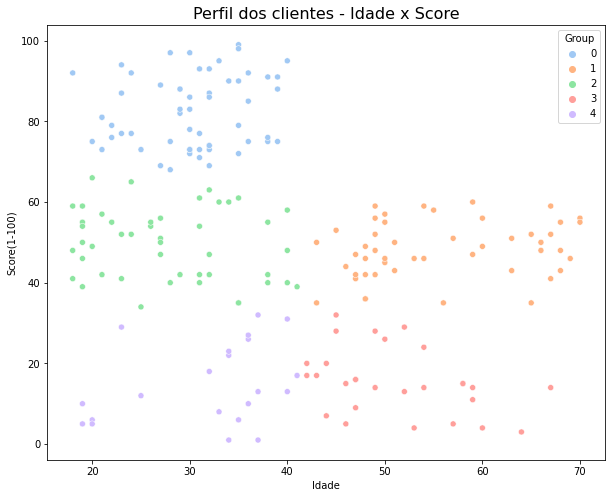

In [94]:
# Visualiza√ß√£o do gr√°fico de dispers√£o com base na separa√ß√£o dos clusters
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df,hue='Group',palette = 'pastel')
plt.xlabel('Idade')
plt.ylabel('Score(1-100)')
plt.title('Perfil dos clientes - Idade x Score',fontdict={'fontsize':16})
plt.show()

O modelo trabalhou de forma a determinar 5 clusters sempre objetivando uma menor vari√¢ncia dos dados quanto √† centr√≥ide de cada cluster no qual eles pertencem. Podemos observar que o grupo vermelho poderia ser rotulado como os clientes que tem os scores mais altos. Esse agrupamento √© importante para definir, por exemplo, a possibilidade de aumento ou concess√£o de cr√©dito a um determinado cliente.

<b>Obrigado!</b>

---